# 最小二乘法实现多项式拟合

多项式拟合：
f(x, w) = w0 + w1x + w2x2 + ...wnxn
其中 w = (w0, w1, w2, ..., wn) 为参数
目标：
min
w n∑i=1(f(xi, w) yi)2
使用最小二乘法求解
噪声
高斯-马尔科夫定理表明，在满足一定条件时（随机噪声 ϵ 的均值 E[ϵ|X] = 0 且独立于 x；随机
ϵ 的方差 Var(ϵ|X) = σ2 I 恒定不变），最小二乘法得到的线性回归参数在所有的无偏估计中具
有最优的有效性，即方差最小。证明过程详见《机器学习算法背后的理论与优化》，史春奇等，清
华大学出版社，2019 年 7 月第 1 版，1.2.2 节。
实例：y = sin(2πx) + ϵ，其中 ϵ 为正态分布噪声，试用一个多项式去拟合该函数。

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed()

In [2]:
X = np.linspace(0,1,10) # 待拟合的点x坐标

Y = np.sin(2*np.pi*X) # 待拟合的点y坐标
epsilon = np.random.normal(0,0.1,size = X.shape) # 添加噪声
Y = Y + epsilon

print(X.shape)
print(Y.shape)
print(epsilon.shape)



(10,)
(10,)
(10,)


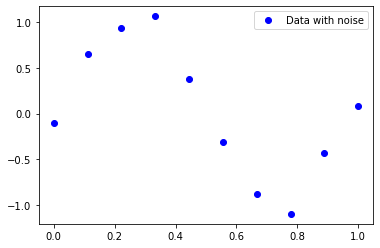

In [3]:
plt.plot(X,Y,'bo',label='Data with noise')
plt.legend()

In [4]:
X_points = np.linspace(0,1,500)
Y_points = np.sin(2*np.pi*X_points)

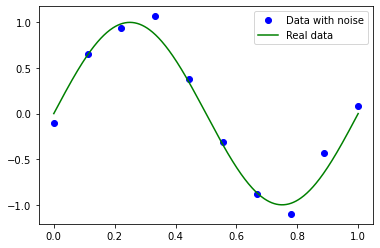

In [5]:
plt.plot(X,Y,'bo',label='Data with noise')
plt.plot(X_points,Y_points,'g',label='Real data')
plt.legend()

正弦曲线

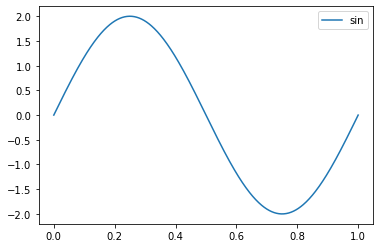

In [6]:
def f(x):
    return 2*np.sin(2*np.pi*x)
plt.plot(X_points,f(X_points),label='sin')
plt.legend()

定义误差

In [7]:
def error(W,x,y):
    f = np.poly1d(W) # 生成一个多项式，x次数由高到低
    return f(x)-y

W:  [0.02999973]


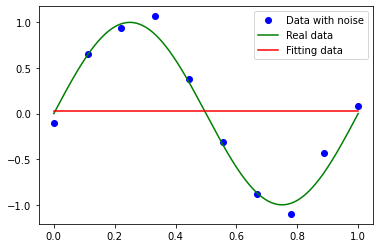

In [8]:
M = 0 # 多项式次数:0
W = np.random.rand(M+1) # 随机生成多项式参数(M+1个随机数的列表)
lsq = leastsq(error, W, args = (X, Y))
W = lsq[0]
print('W: ',W)
plt.plot(X,Y,'bo',label = 'Data with noise')
plt.plot(X_points,Y_points,'g',label = 'Real data')
plt.plot(X_points,np.poly1d(W)(X_points),'r',label='Fitting data')
plt.legend()


W: [-1.23705335  0.64852641]


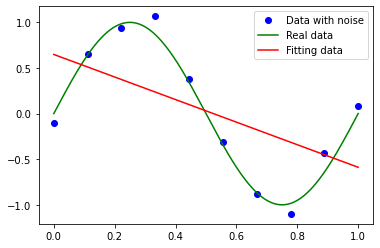

In [9]:
M = 1 # 多项式次数：1
W = np.random.rand(M+1)
lsq = leastsq(error,W,args=(X,Y))
W = lsq[0]
print('W:',W)
plt.plot(X,Y,'bo',label='Data with noise')
plt.plot(X_points,Y_points,'g',label='Real data')
plt.plot(X_points,np.poly1d(W)(X_points),'r',label='Fitting data')
plt.legend()

W: [ 23.09834064 -34.74134197  12.0028703   -0.16383565]


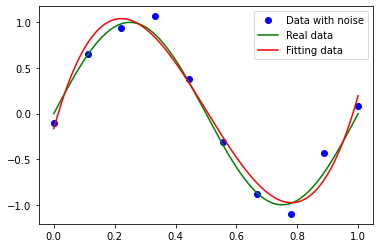

In [10]:
M = 3 # 多项式次数：3
W = np.random.rand(M+1)
lsq = leastsq(error,W,args=(X,Y))
W = lsq[0]
print('W:',W)
plt.plot(X,Y,'bo',label='Data with noise')
plt.plot(X_points,Y_points,'g',label='Real data')
plt.plot(X_points,np.poly1d(W)(X_points),'r',label='Fitting data')
plt.legend()

W: [ 1.38250326e+04 -6.69975285e+04  1.36659809e+05 -1.52386247e+05
  1.00809030e+05 -4.00448319e+04  9.17990166e+03 -1.10287621e+03
  5.78931573e+01 -1.00026706e-01]


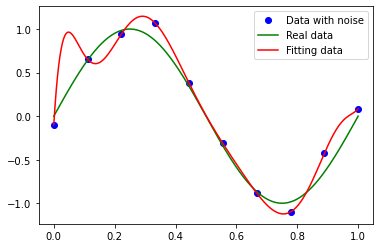

In [11]:
M = 9 # 多项式次数：9
W = np.random.rand(M+1)
lsq = leastsq(error,W,args=(X,Y))
W = lsq[0]
print('W:',W)
plt.plot(X,Y,'bo',label='Data with noise')
plt.plot(X_points,Y_points,'g',label='Real data')
plt.plot(X_points,np.poly1d(W)(X_points),'r',label='Fitting data')
plt.legend()

---
次数太高容易过拟合，可以引入正则化项（或罚项）
L = 经验误差 + w的范数

W: [ -7.25804753  -1.08299832   4.02035668   7.16155791   7.13235167
   2.65476033  -6.32559203 -13.85673519   7.70733867  -0.02222134]


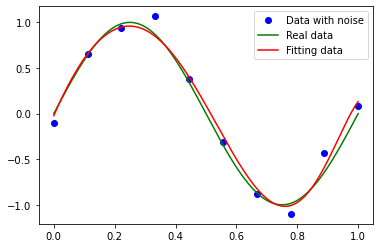

In [12]:
weight = 0.001
def error_L2(W,x,y): # L2范数
    f = np.poly1d(W)
    return np.append(f(x)-y,np.sqrt(0.5*weight*np.square(W)))
M = 9
W = np.random.rand(M+1)
lsq = leastsq(error_L2,W,args=(X,Y))
W = lsq[0]
print('W:',W)
plt.plot(X,Y,'bo',label = 'Data with noise')
plt.plot(X_points,Y_points,'g',label='Real data')
plt.plot(X_points,np.poly1d(W)(X_points),'r',label='Fitting data')
plt.legend()

W: [-0.96003796  0.61358732  1.83963451  2.43294019  1.99829013  0.09858459
 -3.32438711 -6.14416723  3.35406978  0.29323492]


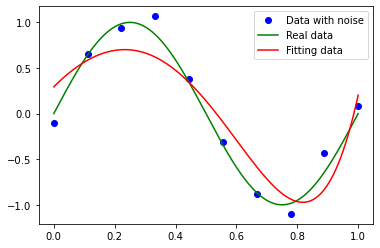

In [13]:
weight = 0.01
def error_L2(W,x,y): # L2范数
    f = np.poly1d(W)
    return np.append(f(x)-y,np.sqrt(0.5*weight*np.square(W)))
M = 9
W = np.random.rand(M+1)
lsq = leastsq(error_L2,W,args=(X,Y))
W = lsq[0]
print('W:',W)
plt.plot(X,Y,'bo',label = 'Data with noise')
plt.plot(X_points,Y_points,'g',label='Real data')
plt.plot(X_points,np.poly1d(W)(X_points),'r',label='Fitting data')
plt.legend()

W: [ 0.94480275  0.89030062  0.74933594  0.48206317  0.04107513 -0.60768439
 -1.3977237  -1.83372237  0.26152984  0.56797785]


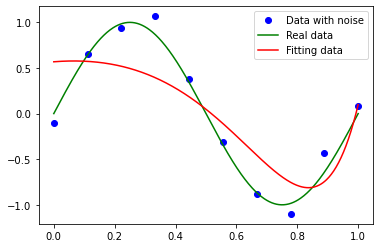

In [14]:
weight = 0.1
def error_L2(W,x,y): # L2范数
    f = np.poly1d(W)
    return np.append(f(x)-y,np.sqrt(0.5*weight*np.square(W)))
M = 9
W = np.random.rand(M+1)
lsq = leastsq(error_L2,W,args=(X,Y))
W = lsq[0]
print('W:',W)
plt.plot(X,Y,'bo',label = 'Data with noise')
plt.plot(X_points,Y_points,'g',label='Real data')
plt.plot(X_points,np.poly1d(W)(X_points),'r',label='Fitting data')
plt.legend()

W: [ 0.37481466  0.31669983  0.23802402  0.13158911 -0.01119391 -0.19745384
 -0.42069877 -0.61334047 -0.45305368  0.44552071]


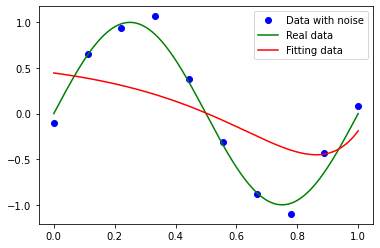

In [15]:
weight = 1
def error_L2(W,x,y): # L2范数
    f = np.poly1d(W)
    return np.append(f(x)-y,np.sqrt(0.5*weight*np.square(W)))
M = 9
W = np.random.rand(M+1)
lsq = leastsq(error_L2,W,args=(X,Y))
W = lsq[0]
print('W:',W)
plt.plot(X,Y,'bo',label = 'Data with noise')
plt.plot(X_points,Y_points,'g',label='Real data')
plt.plot(X_points,np.poly1d(W)(X_points),'r',label='Fitting data')
plt.legend()

W: [ 0.03025739  0.02014726  0.00698306 -0.01024545 -0.03276424 -0.06168564
 -0.0965071  -0.12894063 -0.11584163  0.11617813]


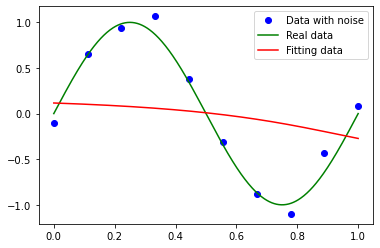

In [16]:
weight = 10
def error_L2(W,x,y): # L2范数
    f = np.poly1d(W)
    return np.append(f(x)-y,np.sqrt(0.5*weight*np.square(W)))
M = 9
W = np.random.rand(M+1)
lsq = leastsq(error_L2,W,args=(X,Y))
W = lsq[0]
print('W:',W)
plt.plot(X,Y,'bo',label = 'Data with noise')
plt.plot(X_points,Y_points,'g',label='Real data')
plt.plot(X_points,np.poly1d(W)(X_points),'r',label='Fitting data')
plt.legend()

---
# 用sklearn中的函数实现多项式拟合

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

**没有添加正则项**

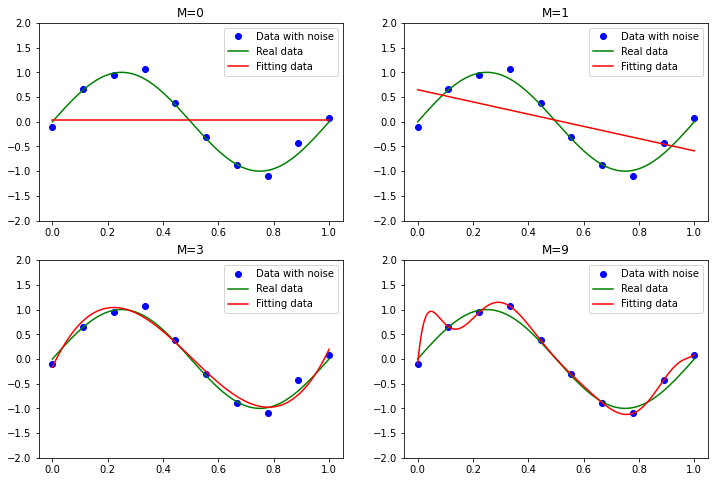

In [19]:
X_TRAIN = X.reshape(-1,1)
Y_TRAIN = Y.reshape(-1,1)
fig = plt.figure(figsize=(12,8))
for i, order in enumerate([0,1,3,9]):
    plt.subplot(2,2,i+1)
    poly = PolynomialFeatures(order)
    X_TRAIN_POLY = poly.fit_transform(X_TRAIN)
    lr = LinearRegression()
    lr.fit(X_TRAIN_POLY,Y_TRAIN)
    
    plt.ylim(-2,2)
    plt.plot(X,Y,'bo',label='Data with noise')
    plt.plot(X_points,Y_points,'g',label = 'Real data')
    plt.plot(X_points,lr.predict(poly.fit_transform(X_points.reshape(-1,1))),'r',label='Fitting data')
    plt.title("M={}".format(order))
    plt.legend()

**添加正则项**

In [20]:
from sklearn.linear_model import Ridge

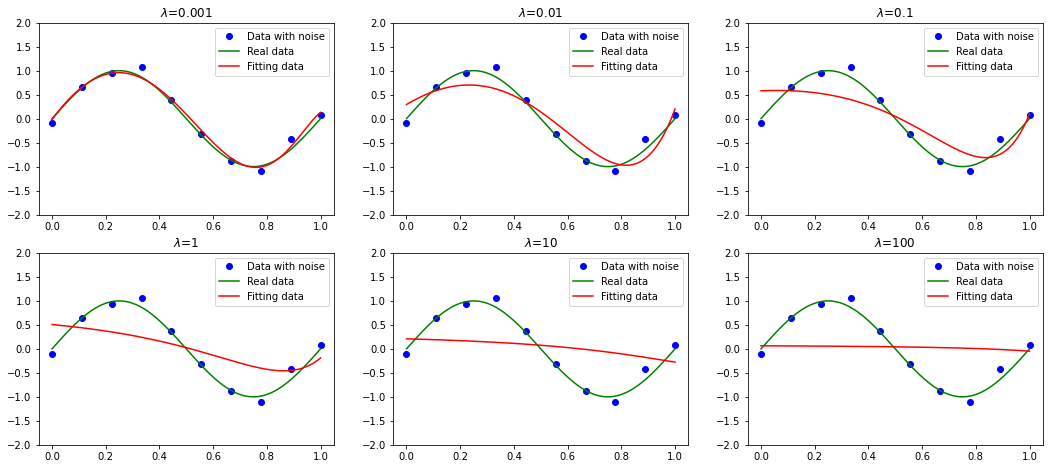

In [22]:
M = 9
fig = plt.figure(figsize=(18,12))
for i,lamb in enumerate([0.001,0.01,0.1,1,10,100]):
    plt.subplot(3,3,i+1)
    poly = PolynomialFeatures(M)
    X_TRAIN_POLY = poly.fit_transform(X_TRAIN)
    lr = Ridge(alpha=lamb/2)
    lr.fit(X_TRAIN_POLY,Y_TRAIN)
    
    plt.ylim(-2,2)
    plt.plot(X,Y,'bo',label = 'Data with noise')
    plt.plot(X_points,Y_points,'g',label='Real data')
    plt.plot(X_points,lr.predict(poly.fit_transform(X_points.reshape(-1,1))),'r',label='Fitting data')
    plt.title("$\lambda$={}".format(lamb))
    plt.legend()

# 贝叶斯曲线拟合

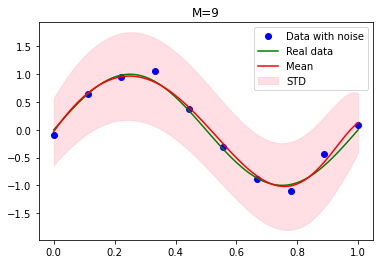

In [31]:
M = 9
poly = PolynomialFeatures(M)
X_TRAIN_POLY = poly.fit_transform(X_TRAIN)

alpha = 5e-3 # 模型参数精度
beta = 11.1  # 数据集噪声精度
I = np.eye(np.size(X_TRAIN_POLY,1)) # 单位矩阵
S_INV = alpha * I + beta * np.matmul(X_TRAIN_POLY.T,X_TRAIN_POLY)
S = np.linalg.inv(S_INV)
T = np.matmul(X_TRAIN_POLY.T,Y_TRAIN)

X_points_POLY = poly.fit_transform(X_points.reshape(-1,1))
# 计算均值
MEAN = beta * np.matmul(X_points_POLY,np.matmul(S,T))
# 计算方差与标准差
SIGMA2 = 1/beta + np.sum(np.matmul(np.matmul(X_points_POLY,S),X_points_POLY.T),axis=1)/np.size(X_TRAIN,0) # average
STD = np.sqrt(SIGMA2)

# 绘制均值曲线及1个标准差区域
plt.plot(X,Y,'bo',label='Data with noise')
plt.plot(X_points,Y_points,'g',label='Real data')
plt.plot(X_points,MEAN,c="r",label="Mean")
plt.fill_between(X_points,MEAN.flatten()-STD,MEAN.flatten()+STD,color="pink",label="STD",alpha=0.5)
plt.title("M={}".format(M))
plt.legend()